# Введение в теорию вероятностей и статистику

## Множества и операции над ними

### Конечные множества в базовом python

In [1]:
s1 = {1, 2, 3}

In [2]:
s1

{1, 2, 3}

In [3]:
s2 = set()

In [4]:
s2

set()

In [5]:
s1.add(4)

In [6]:
s1

{1, 2, 3, 4}

In [7]:
s1.remove(1)

In [8]:
s1

{2, 3, 4}

In [9]:
s1.add(3)

In [10]:
s1

{2, 3, 4}

In [11]:
set1 = {1, 2, 3}
set2 = {3, 4, 5}

### Объединение (A $\cup$ B)

In [12]:
set1.union(set2)

{1, 2, 3, 4, 5}

In [13]:
set1 | set2

{1, 2, 3, 4, 5}

### Пересечение (A $\cap$ B)

In [14]:
set1.intersection(set2)

{3}

In [15]:
set1 & set2

{3}

### Разность (A $\setminus$ B)

In [16]:
set1.difference(set2)

{1, 2}

In [17]:
set1 - set2

{1, 2}

### Подмножества (A $\subset$ B, A $\subseteq$ B)

In [18]:
{1, 2} < set1

True

In [19]:
{1, 2, 3} <= set1

True

In [20]:
set2 > {3, 4, 5}

False

## Вероятность как мера множества

Из чего состоит вероятностное пространство?

$\Omega$ - множество всех возможных исходов.

**Случайное событие** - некое подмножество $\Omega$.

$\mathcal{F}$ - множество всех событий.

$\mathbb{P}$ - вероятностная мера: правило, сопоставляющее события и их вероятность (размер соответствующего подмножества событий), при этом $\mathbb{P}[\Omega] = 1$.

Таким образом, вероятность события можно трактовать как долю от $\Omega$, которую событие занимает.

**NB**: пересечение событий соответствует логическому "и", объединение - логическому "или". Вероятность, что событие *не* произойдет - разность между $\Omega$ и событием.

### Аксиомы:

- $\mathbb{P}(\Omega) = 1$;
- вероятность события не может быть отрицательной;
- для непересекающихся событий вероятность их объединения равна сумме вероятностей каждого.

### Следствия:

- вероятность события не может превышать 1;
- $\mathbb{P}[\neg A] = 1 - \mathbb{P}[A]$;
- $\mathbb{P}[\emptyset] = 0$
- $\mathbb{P}[A \cup B] = \mathbb{P}[A] + \mathbb{P}[B] - \mathbb{P}[A \cap B)$

## Условная вероятность

$$
\mathbb{P}[A | B] = \frac{\mathbb{P}[A \cap B]} {\mathbb{P}[B]}
$$

События **независимы**, если $\mathbb{P}[A | B] = \mathbb{P}[A]$. Иными словами,  $\mathbb{P}[A \cap B] = \mathbb{P}[A]\mathbb{P}[B]$.

### Формула полной вероятности и теорема Байеса

На практике нередки события, вероятность которых зависит от начальных условий:

$$
\mathbb{P}[A] = \sum_{i=0}^{n} \mathbb{P}[A | B_{i}] \mathbb{P}[B_{i}]
$$

Отсюда

$$
\mathbb{P}[B | A] = \frac {\mathbb{P}[A \cap B]} {\sum_{i=0}^{n} \mathbb{P}[A | B_{i}]\mathbb{P}[B_{i}]}, или
$$

$$
\mathbb{P}[B | A] = \frac {\mathbb{P}[A | B]\mathbb{P}[B]} {\mathbb{P}[A]}
$$

**NB:** как видно, в общем случае:
- $\mathbb{P}[A | B] \ne \mathbb{P}[B | A]$;
- независимые события могут пересекаться.

## Случайные величины

**Случайная величина (random variable)** отображает исход эксперимента на ось действительных чисел.

### Дискретный случай

#### PMF

Дискретную переменную $X$ можно описать с помощью *функции вероятности* (probability mass function, **PMF**):

$$
p_{X}(x) = \mathbb{P}[X=x]
$$

Логично, что:

$$
\sum_{x\in X(\Omega)} p_{X}(x) = 1
$$

PMF можно визуализировать с помощью стобчатой диаграммы.

In [21]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

X = st.randint(1, 7)

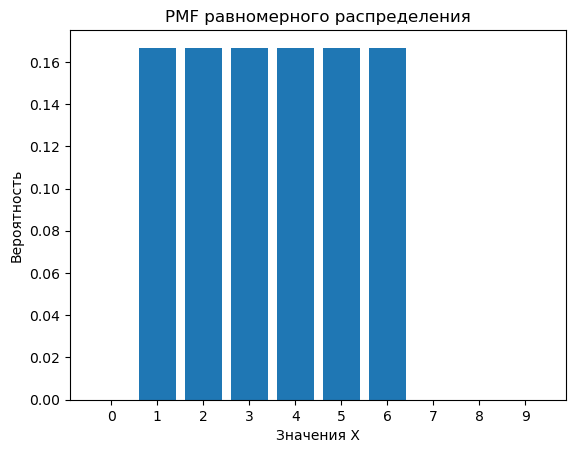

In [22]:
plt.title('PMF равномерного распределения')
plt.xlabel('Значения X')
plt.ylabel('Вероятность')
plt.xticks(range(0, 10))
plt.bar(range(0, 10), [X.pmf(x) for x in range(0, 10)]);

In [23]:
sum([X.pmf(x) for x in range(0, 10)])

0.9999999999999999

In [24]:
X = np.random.randint(1, 7, 100)

In [25]:
numbers, counts = np.unique(X, return_counts=True)
pmf = counts / len(X)

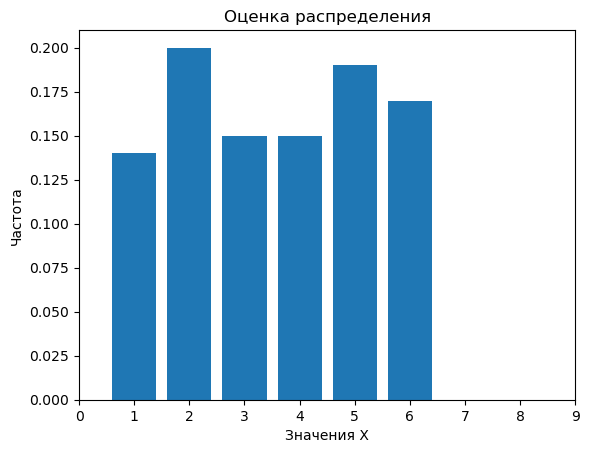

In [26]:
plt.title('Оценка распределения')
plt.xlabel('Значения X')
plt.ylabel('Частота')
plt.bar(numbers, pmf)
plt.xticks(range(0, 10));

#### CDF

Другой способ описания - *функция распределения* (cumulative distribution function, **CDF**):

$$
F_{X}(k) = \mathbb{P}[X \leqslant k]
$$

Иными словами, это сумма значений PMF для $X \leqslant k$

In [27]:
X = st.randint(1, 7)

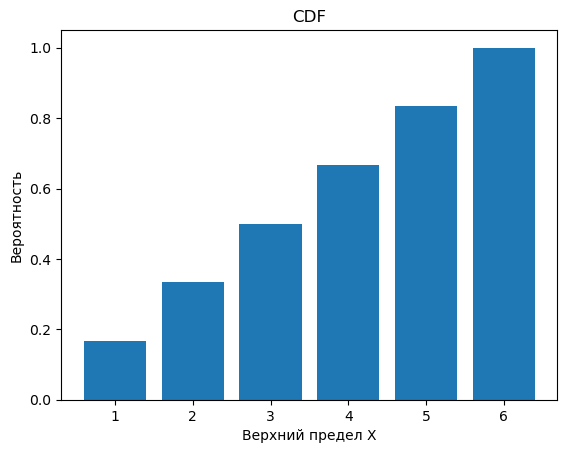

In [28]:
plt.title('CDF')
plt.xlabel('Верхний предел Х')
plt.ylabel('Вероятность')
plt.bar(range(1, 7), [X.cdf(x) for x in range(1, 7)]);

- CDF не убывает;
- CDF увеличивается ступенчато при $p_{X}(x) >0$;
- $F_{X}(-\infty) = 0$
- $F_{X}(+\infty) = 1$

#### Матожидание

$$
\mathbb{E}[X] = \sum_{x\in X(\Omega)} x p_{X}(x)
$$

In [29]:
sum(x * X.pmf(x) for x in range(1,7))

3.5

In [30]:
X.expect()

3.5

##### Свойства:

$$
\mathbb{E}[g(X)] = \sum_{x\in X(\Omega)} g(x) p_{X}(x)
$$

In [31]:
X.expect(lambda x: x ** 2)

15.166666666666666

In [32]:
sum(x ** 2 * X.pmf(x) for x in range(1,7))

15.166666666666666

$$
\mathbb{E}[g(X) + h(X)] = \mathbb{E}[g(X)] + \mathbb{E}[h(X)]
$$

$$
\mathbb{E}[cX] = c \mathbb{E}[X]
$$

$$
\mathbb{E}[X+c] = \mathbb{E}[X] + c
$$

#### Моменты. Дисперсия, асимметрия, эксцесс.

$\mathbb{E}[X^k]$ - **k-й момент** переменной Х. Также встречается понятие **центральный момент** ($\mathbb{E}[(X-\mathbb{E}[X])^k]$)

**Дисперсия (variance)** определяется как $\mathbb{E}[(X-\mathbb{E}[X])^2]$ (то есть второй центральный момент), или, после раскрытия скобок:

$$
Var(X) = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$

In [33]:
sum(x ** 2 * X.pmf(x) for x in range(1,7)) - sum(x * X.pmf(x) for x in range(1,7)) ** 2

2.916666666666666

In [34]:
X.expect(lambda x: (x - X.expect()) ** 2)

2.9166666666666665

In [35]:
X.var()

2.9166666666666665

##### Свойства дисперсии:

$$
Var(cX) = c^2Var(X)
$$

$$
Var(X+c) = Var(X)
$$

Дисперсия показывает, насколько сильно значения отклоняются от среднего. Квадратный корень из дисперсии называется **стандартным отклонением ($\sigma$)**.

Третий момент показывает асимметричность распределения. Величина

$$
\frac{\mathbb{E}[(X-\mathbb{E}[X])^3]}{\sigma^3}
$$

называется **коэффициентом асимметрии (skewness)**.

In [36]:
# Равномерное распределение симметрично:
X.expect(lambda x: (x - X.expect()) ** 3) / X.var() ** 1.5

0.0

In [37]:
X.stats(moments='s')

0.0

Четвертый момент демонстрирует, насколько тяжелые "хвосты" у распределения. Величина

$$
\frac{\mathbb{E}[(X-\mathbb{E}[X])^4]}{\sigma^4} - 3
$$

называется **коэффициентом эксцесса (kurtosis)**. Большое значение символизирует острый пик в районе матожидания, при отрицательных значениях распределение очень гладкое.

In [38]:
X.expect(lambda x: (x - X.expect()) ** 4) / X.var() ** 2 - 3

-1.2685714285714282

In [39]:
X.stats(moments='k')

-1.2685714285714285

### Дискретные распределения на практике

#### Дискретное равномерное ($X \sim U(a, b)$)

Число возможных значений ($b-a+1$) обозначим как $n$:

$$
p_X(x) = 
\begin{equation}
\begin{cases}
  \frac{1}{n}\text{, если }a\leqslant x \leqslant b \\
  0 \text{ иначе}
\end{cases}
\end{equation}
$$

$$
\mathbb{E}[X] = \frac{a + b}{2}
$$

$$
Var(X) = \frac{n^2-1}{12}
$$

In [40]:
35/12

2.9166666666666665

#### Распределение Бернулли ($X \sim Bernoulli(p)$)

Распределение подходит для одного эсперимента вида "успех (1) или неудача (0)". Вероятность успеха равна $p$, а неудачи, соответственно, $1-p$.

$$
p_X(x) = 
\begin{equation}
\begin{cases}
  p \text{, если } x = 1 \\
  1-p \text{, если } x = 0
\end{cases}
\end{equation}
$$

$$
\mathbb{E}[X] = p
$$

$$
Var(X) = p(1-p)
$$

In [41]:
X = st.bernoulli(0.3)

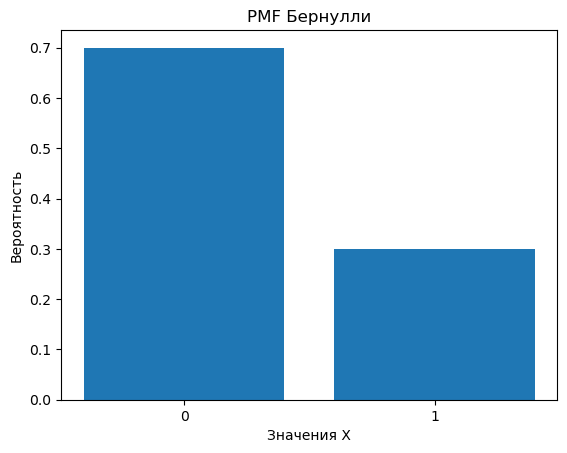

In [42]:
plt.title('PMF Бернулли')
plt.xlabel('Значения X')
plt.ylabel('Вероятность')
plt.xticks(range(0, 10))
plt.bar(range(2), [X.pmf(x) for x in range(2)]);

#### Биномиальное распределение ($X \sim Binomial(n, p)$)

Обобщение распределения Бернулли для $n$ попыток.

Какова вероятность получить ровно $k$ удачных результатов? Для этого должно произойти $k$ успешных попыток и $n-k$ неудачных, при этом надо помнить, что есть несколько способов выбрать $k$ из $n$.

$$
p_X(k) = C^k_n p^k(1-p)^{n-k},
$$ где

$$
C^k_n = \frac{n!}{k!(n-k)!}
$$

и 

$$
0 \leqslant k \leqslant n
$$

In [43]:
X = st.binom(5, 0.5)

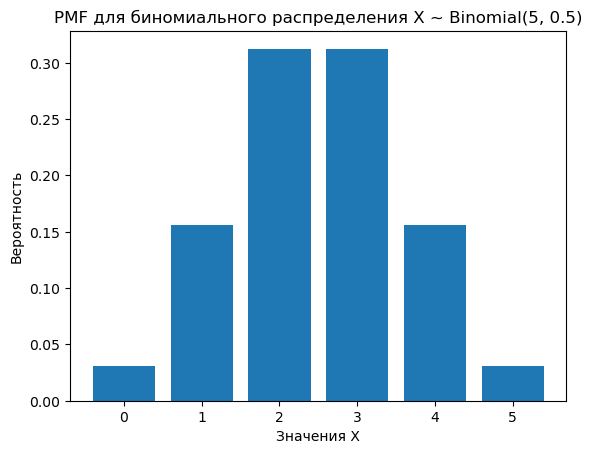

In [44]:
plt.title('PMF для биномиального распределения X ~ Binomial(5, 0.5)')
plt.xlabel('Значения X')
plt.ylabel('Вероятность')
plt.xticks(range(0, 10))
plt.bar(range(6), [X.pmf(x) for x in range(6)]);

$$
\mathbb{E}[X] = np
$$

$$
Var(X) = np(1-p)
$$

#### Геометрическое распределение ($X \sim Geometric(p)$)

В данном случае эксперимент продолжается неограниченное число раз до первого успеха.

$$
p_X(k) =p(1-p)^{k-1}\text{, где }k \geqslant 1
$$

In [45]:
X = st.geom(0.25)

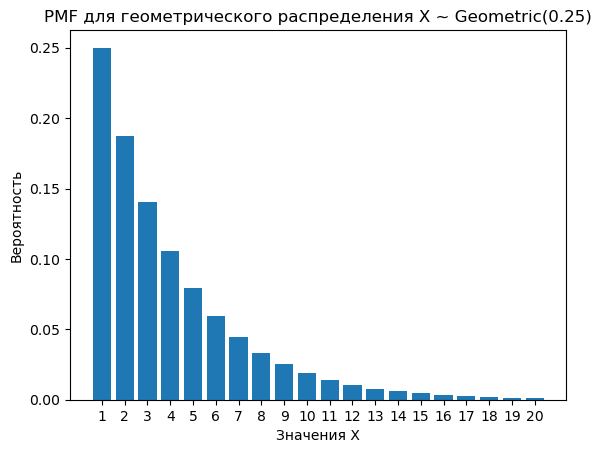

In [46]:
plt.title('PMF для геометрического распределения X ~ Geometric(0.25)')
plt.xlabel('Значения X')
plt.ylabel('Вероятность')
plt.xticks(range(1, 21))
plt.bar(range(1, 21), [X.pmf(x) for x in range(1,21)]);

$$
\mathbb{E}[X] = \frac{1}{p}
$$

$$
Var(X) = \frac{1-p}{p^2}
$$

$$
\mathbb{P}[X > k] = (1-p)^k
$$

#### Распределение Пуассона ($X \sim Poisson(\lambda)$)

Вероятность того, что случится $k$ одинаковых событий за период времени, если известно среднее количество этих событий за этот период.

$$
p_X(k) = \frac{\lambda^k e^{-\lambda}}{k!}\text{, где }k \geqslant 1
$$

$\lambda > 0$ - среднее количество событий за период времени.

In [47]:
X = st.poisson(2)

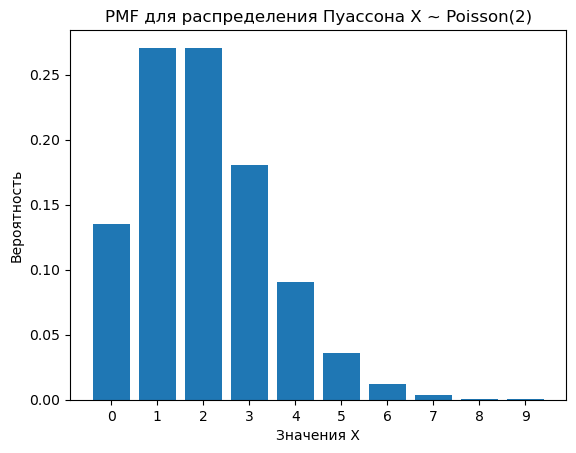

In [48]:
plt.title('PMF для распределения Пуассона X ~ Poisson(2)')
plt.xlabel('Значения X')
plt.ylabel('Вероятность')
plt.xticks(range(10))
plt.bar(range(10), [X.pmf(x) for x in range(10)]);

$$
\mathbb{E}[X] = \lambda
$$

$$
Var(X) = \lambda
$$

#### Приближение $Binomial(n, p)$ через $Poisson(np)$ для больших n и малых p

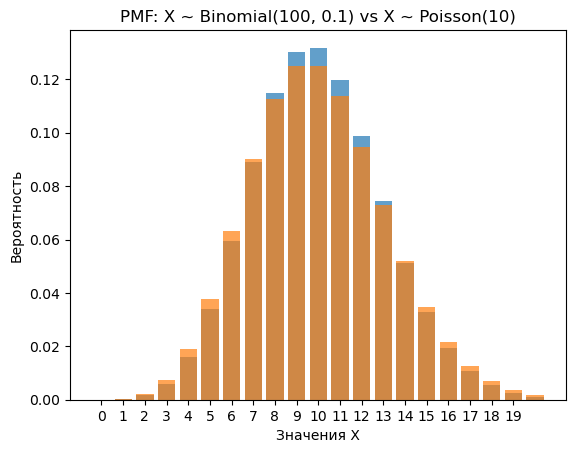

In [49]:
plt.title('PMF: X ~ Binomial(100, 0.1) vs X ~ Poisson(10)')
plt.xlabel('Значения X')
plt.ylabel('Вероятность')
plt.xticks(range(0, 20))
X = st.binom(100, 0.1)
plt.bar(range(21), [X.pmf(x) for x in range(21)], alpha=0.7);
Y = st.poisson(10)
plt.bar(range(21), [Y.pmf(x) for x in range(21)], alpha=0.7);

---

### Непрерывный случай

#### PDF

В случае непрерывной величины вероятность в отдельной точке имеет меру $\emptyset$, и мы можем говорить лишь о вероятности нахождения в каком-то интервале. Непрерывный аналог PMF называется *плотностью вероятности* (probability density function, **PDF**):

In [50]:
X = st.norm(0, 0.3)

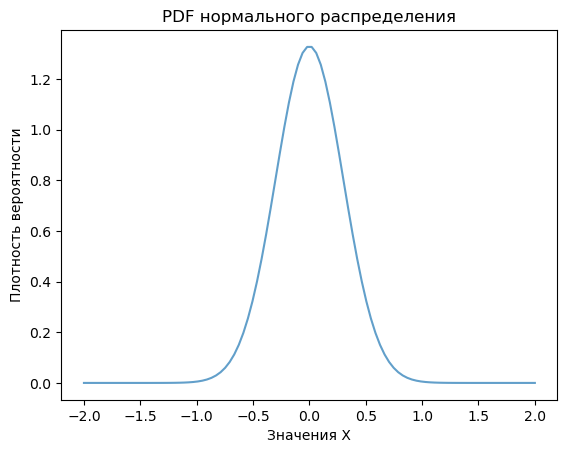

In [51]:
plt.title('PDF нормального распределения')
plt.xlabel('Значения X')
plt.ylabel('Плотность вероятности')
points = np.linspace(-2, 2, 100)
pdf = np.array([X.pdf(x) for x in points])
plt.plot(points, pdf, alpha=0.7);

$$
\mathbb{P}[a\leqslant x \leqslant b] = \int_{a}^{b} f_{X}(x) dx
$$

In [52]:
from scipy.integrate import trapezoid
trapezoid(pdf[(points >= -0.5) & (points < 0.5)], points[(points >= -0.5) & (points < 0.5)])

0.8780123315414601

In [53]:
trapezoid(pdf[(points >= -1) & (points < 1)], points[(points >= -1) & (points < 1)])

0.9990148298319603

#### Свойства PDF

- PDF всегда неотрицательна (но, в отличие от PMF, ее значение может превышать 1);
- однако площадь под всей кривой $\int_{\Omega} f_{X}(x) dx = 1$

#### CDF

$$
F_X(x) = \mathbb{P}[x \leqslant k] = \int_{- \infty}^{k} f_{X}(x) dx
$$

Соответственно,

$$
f_{X}(x) = \frac{dF_X(x)}{dx}
$$

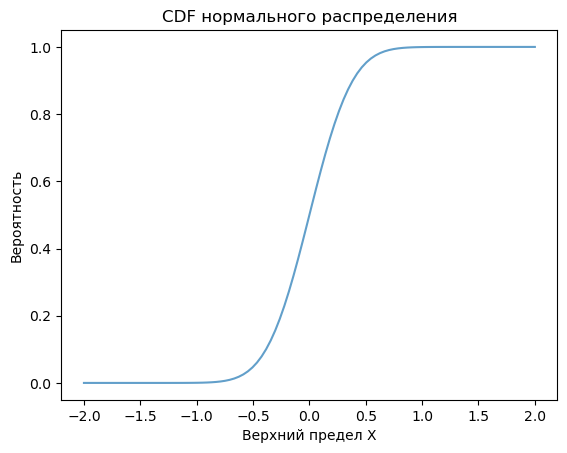

In [54]:
plt.title('CDF нормального распределения')
plt.xlabel('Верхний предел Х')
plt.ylabel('Вероятность')
points = np.linspace(-2, 2, 100)
cdf = np.array([X.cdf(x) for x in points])
plt.plot(points, cdf, alpha=0.7);

CDF будет более плавной, но ее свойства сохраняются:

- CDF не убывает;
- $F_{X}(-\infty) = 0$
- $F_{X}(+\infty) = 1$

### Моменты

$$
\mathbb{E}[X] = \int_{\Omega} xf_{X}(x) dx
$$

Свойства сохраняются:

$$
\mathbb{E}[g(X)] = \int_{\Omega} g(x)f_{X}(x) dx
$$

$$
\mathbb{E}[g(X) + h(X)] = \mathbb{E}[g(X)] + \mathbb{E}[h(X)]
$$

$$
\mathbb{E}[cX] = c \mathbb{E}[X]
$$

$$
\mathbb{E}[X+c] = \mathbb{E}[X] + c
$$

Другие моменты строятся аналогично:

$$
\mathbb{E}[X^k] = \int_{\Omega} x^kf_{X}(x) dx
$$

### Другие статистики

**Медиана** определяется как значение $x=c$, где $\int_{- \infty}^{c} f_{X}(x) dx = \int_{c}^{\infty} f_{X}(x) dx$.

Иными словами, CDF **$F_X(c) = \frac{1}{2}$**


**Мода** - значение $x$, при котором значение PDF максимально ($\underset{x\in\Omega}{\mathrm{argmax}}f_X(x)$)

### Непрерывные распределения на практике

#### Непрерывное равномерное ($X \sim Uniform(a, b)$)

$$
f_X(x) = 
\begin{equation}
\begin{cases}
  \frac{1}{b-a}\text{, если }a\leqslant x \leqslant b \\
  0 \text{ иначе}
\end{cases}
\end{equation}
$$

In [55]:
X = st.uniform(1, 5) # 1..1+5

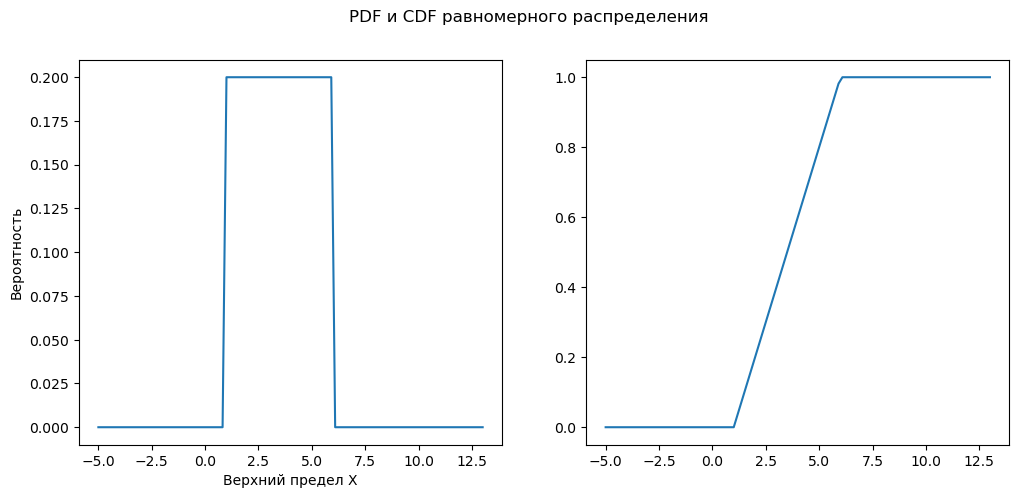

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('PDF и CDF равномерного распределения')
ax[0].set(xlabel = 'Значения X', ylabel = 'Плотность вероятности')
ax[0].set(xlabel = 'Верхний предел X', ylabel = 'Вероятность')

points = np.linspace(-5, 13, 100)
pdf = np.array([X.pdf(x) for x in points])
ax[0].plot(points, pdf);

cdf = np.array([X.cdf(x) for x in points])
ax[1].plot(points, cdf);

$$
\mathbb{E}[X] = \frac{a + b}{2}
$$

$$
Var(X) = \frac{(b-a)^2}{12}
$$

#### Экспоненциальное распределение ($X \sim Exponential(\lambda)$)

Его можно рассматривать как непрерывный аналог распределения Пуассона: вместо подсчета событий в единицу времени используется средний промежуток времени между двумя событиями.

$$
f_X(x) = 
\begin{equation}
\begin{cases}
  \lambda e^{-\lambda x}\text{, если }x\geqslant 0\\
  0 \text{ иначе}
\end{cases}
\end{equation}
$$

In [57]:
X1 = st.expon(scale=1/2)
X2 = st.expon(scale=1/5)

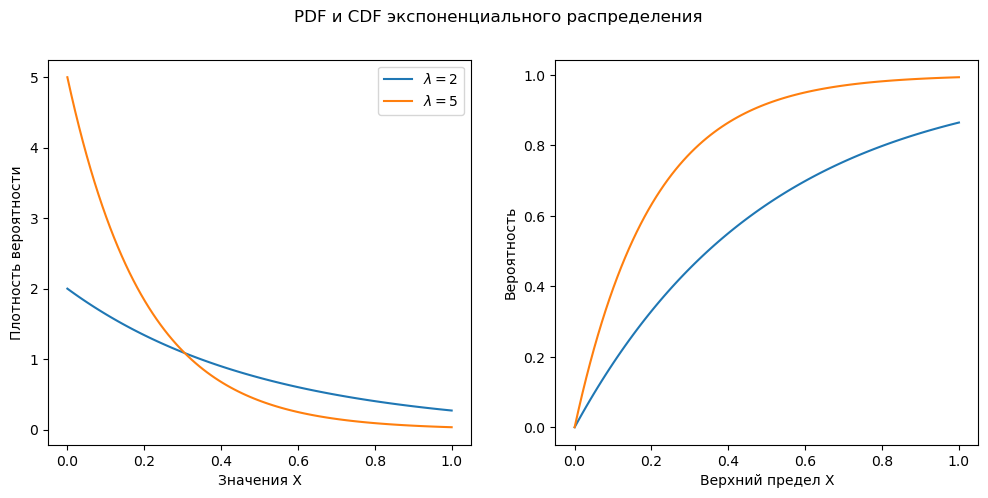

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('PDF и CDF экспоненциального распределения')

ax[0].set(xlabel = 'Значения X', ylabel = 'Плотность вероятности')
ax[1].set(xlabel = 'Верхний предел X', ylabel = 'Вероятность')

points = np.linspace(0, 1, 100)
pdf1 = np.array([X1.pdf(x) for x in points])
ax[0].plot(points, pdf1);
pdf2 = np.array([X2.pdf(x) for x in points])
ax[0].plot(points, pdf2);
ax[0].legend(['$\lambda = 2$', '$\lambda = 5$'])

cdf1 = np.array([X1.cdf(x) for x in points])
ax[1].plot(points, cdf1);
cdf2 = np.array([X2.cdf(x) for x in points])
ax[1].plot(points, cdf2);

$$
\mathbb{E}[X] = \frac{1}{\lambda}
$$

$$
Var(X) = \frac{1}{\lambda^2}
$$

#### Нормальное распределение ($X \sim \mathcal{N}(\mu, \sigma^2)$)

$$
\large{f_X(x) = \frac{1}{\sqrt{2\pi \sigma^2}}  e^{\frac{-(x-\mu)^2}{2\sigma^2}}}
$$

$$
\mathbb{E}[X] = \mu
$$

$$
Var(X) = \sigma^2
$$

При $\mu = 0$ и $\sigma^2 = 1$ получается *стандартное нормальное распределение*:

$$
\large{f_X(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}}
$$

In [59]:
X = st.norm(0, 1)

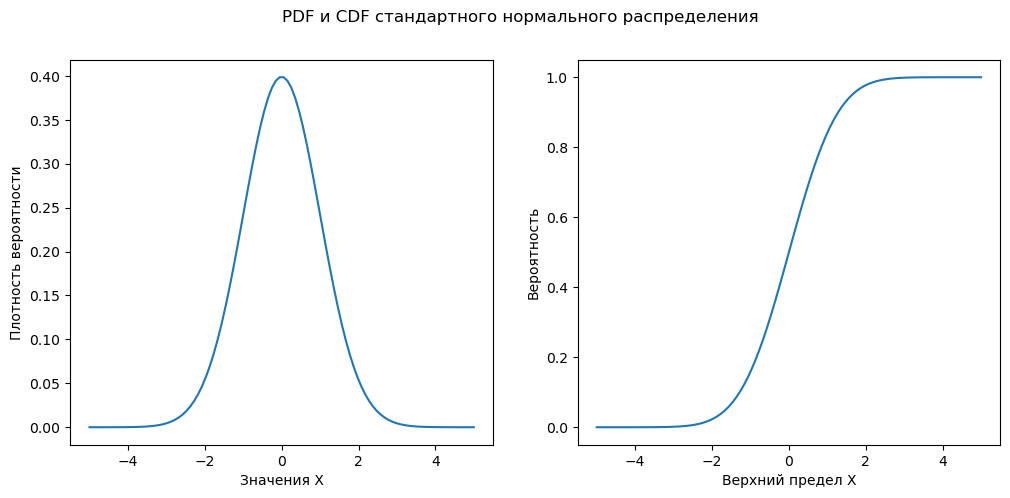

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('PDF и CDF стандартного нормального распределения')
ax[0].set(xlabel = 'Значения X', ylabel = 'Плотность вероятности')
ax[1].set(xlabel = 'Верхний предел X', ylabel = 'Вероятность')

points = np.linspace(-5, 5, 100)
pdf = np.array([X.pdf(x) for x in points])
ax[0].plot(points, pdf);

cdf = np.array([X.cdf(x) for x in points])
ax[1].plot(points, cdf);

Свойства нормальной PDF:

- площадь под кривой в диапазоне [μ−σ, μ+σ] всегда равна 0.6826;
- площадь под кривой в диапазоне от [μ−2σ, μ+2σ] всегда равна 0.9544;
- площадь под кривой в диапазоне от [μ−3σ, μ+3σ] всегда равна 0.9972;

CDF стандартной гауссианы:

$$
\Phi(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^k{e^{-\frac{x^2}{2}}dx}
$$

Она является одним из видов так называемой **функции ошибок**:

$$
erf(k) = \frac{2}{\sqrt{\pi}}\int_0^k{e^{-x^2}dx}
$$

$$
\Phi(k) = \frac{1 + erf\left(\frac{x}{\sqrt(2)}\right)}{2}
$$

Можно выразить CDF любого нормального распределения через $\Phi$:

$$
F_X(x) = \Phi\left(\frac{x-\mu}{\sigma}\right)
$$

#### Сумма случайных переменных

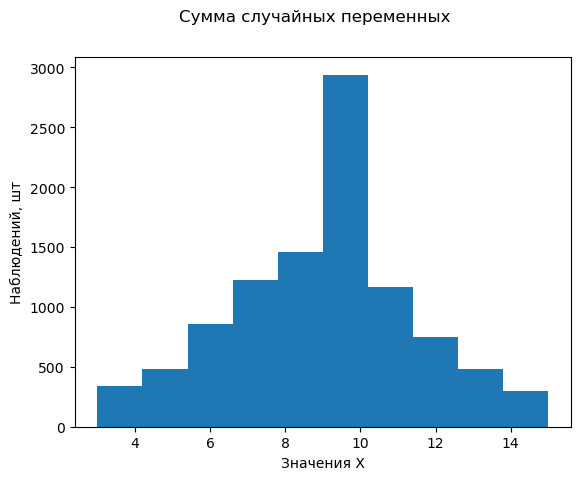

In [61]:
plt.suptitle('Cумма случайных переменных')
plt.xlabel('Значения X')
plt.ylabel('Наблюдений, шт')

pdf = sum(np.random.randint(1, 6, 10000) for _ in range(3))
plt.hist(pdf);

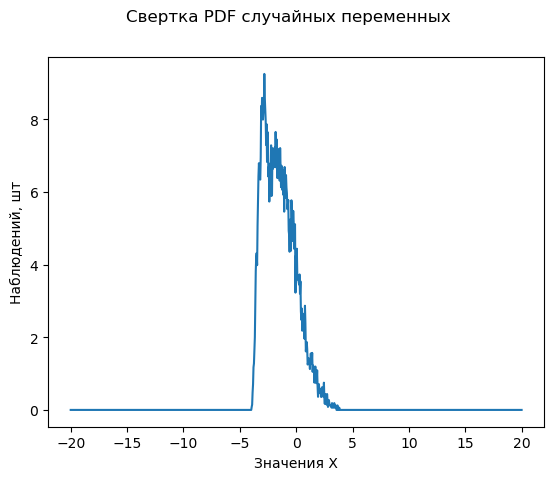

In [62]:
from scipy.signal import convolve
from functools import reduce

points = np.linspace(-20, 20, 1000)

# Convolve the two arrays
pdf_sum = reduce(lambda x, y: convolve(x, y, mode="same"),
                 [np.array([st.uniform(-2, np.random.randint(1, 5)).pdf(x) for x in points]) for _ in range(2)])

plt.suptitle('Свертка PDF случайных переменных')
plt.xlabel('Значения X')
plt.ylabel('Наблюдений, шт')

plt.plot(points, pdf_sum);

#### Приближение $Binomial(n, p)$ через $\mathcal{N}(np, np(1-p))$ для больших n и средних p

В качестве эмирического критерия обычно берется $np > 5$ и $n(1-p) > 5$.

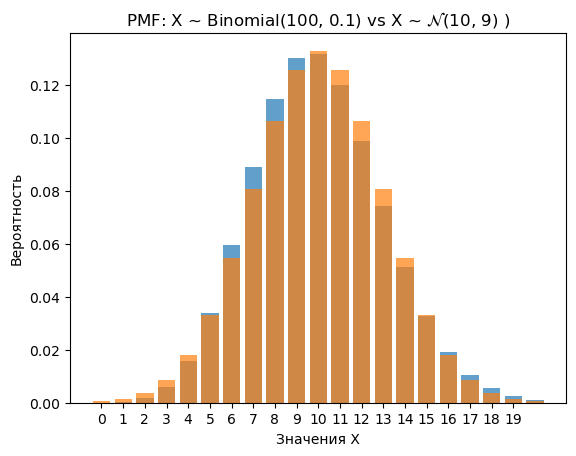

In [63]:
plt.title('PMF: X ~ Binomial(100, 0.1) vs X ~ $\mathcal{N}$(10, 9) )')
plt.xlabel('Значения X')
plt.ylabel('Вероятность')
plt.xticks(range(0, 20))
X = st.binom(100, 0.1)
plt.bar(range(21), [X.pmf(x) for x in range(21)], alpha=0.7);
Y = st.norm(10, 3)
plt.bar(range(21), [Y.pdf(x) for x in range(21)], alpha=0.7);

#### Логнормальное распределение ($X \sim \mathcal{LogN}(\mu, \sigma^2)$)

Величина, логарифм которой распределен нормально:

$$
\large{f_X(x) = \frac{1}{x\sqrt{2\pi \sigma^2}}  e^{\frac{-(ln(x)-\mu)^2}{2\sigma^2}}}
$$

($x$ и $\sigma$ строго положительны.)

Или, проще говоря, если $X \sim \mathcal{LogN}(\mu, \sigma^2)$, то $Y=ln(X)$ распределена как $Y \sim \mathcal{N}(\mu, \sigma^2)$. И наоборот, для любой нормальной переменной ее экспонента распределена логнормально.

Типичные примеры такого распределения: доход компании, сумма перевода, число подписчиков телеграм-канала.

In [64]:
X1 = st.lognorm(1, 0)
X2 = st.lognorm(0.5, 0)

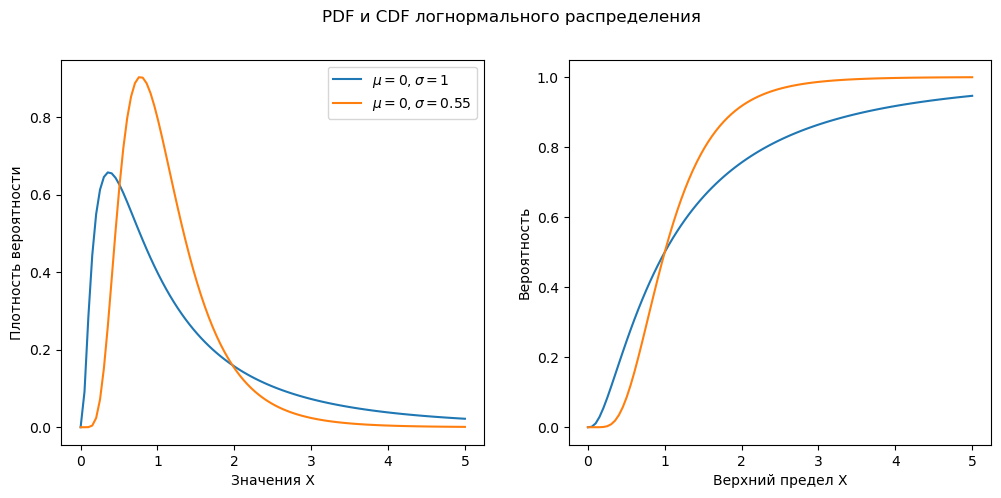

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('PDF и CDF логнормального распределения')
ax[0].set(xlabel = 'Значения X', ylabel = 'Плотность вероятности')
ax[1].set(xlabel = 'Верхний предел X', ylabel = 'Вероятность')

points = np.linspace(0, 5, 100)
pdf1 = np.array([X1.pdf(x) for x in points])
ax[0].plot(points, pdf1);
pdf2 = np.array([X2.pdf(x) for x in points])
ax[0].plot(points, pdf2);
ax[0].legend(['$\mu = 0, \sigma = 1$', '$\mu = 0, \sigma = 0.55$'])

cdf1 = np.array([X1.cdf(x) for x in points])
ax[1].plot(points, cdf1);
cdf2 = np.array([X2.cdf(x) for x in points])
ax[1].plot(points, cdf2);

$$
\large{\mathbb{E}[X] = e^{\left(\mu + \frac{\sigma^2}{2}\right)}}
$$

$$
\large{Var(X) = (e^{\sigma^2} - 1)(e^{2\mu + \sigma^2})}
$$

### PPF и генерация случайных чисел

Percentage point function - функция, обратная CDF. То есть задав вероятность, мы получаем соответствующий верхний предел случайной величины.

Одно из практических применений - симуляция разных распределений, имея лишь значения, сгенерированные равномерно:

In [66]:
X = np.random.uniform(0, 1, 10000)

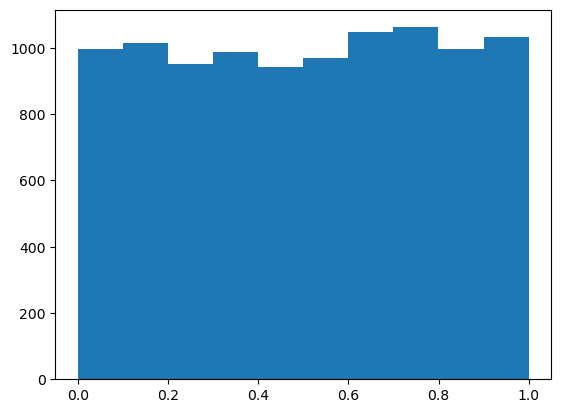

In [67]:
plt.hist(X);

In [68]:
Y = [st.norm.ppf(x) for x in X]

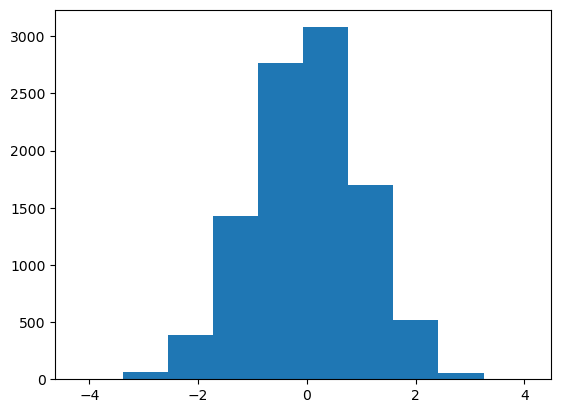

In [69]:
plt.hist(Y);

Верно и обратное: если мы знаем распределение исходной величины, мы можем симулировать равномерное:

In [70]:
X = np.random.normal(0, 1, 10000)

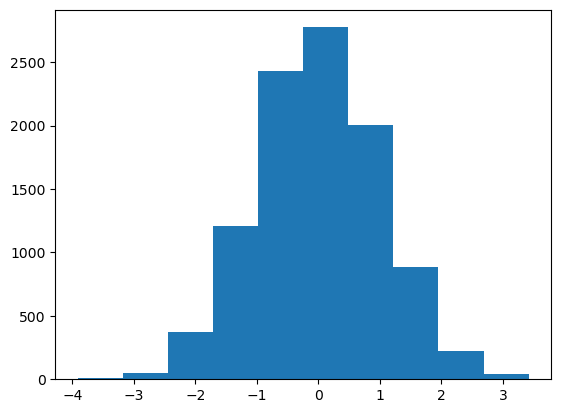

In [71]:
plt.hist(X);

In [72]:
Y = [st.uniform(0, 1).ppf(x) for x in X]

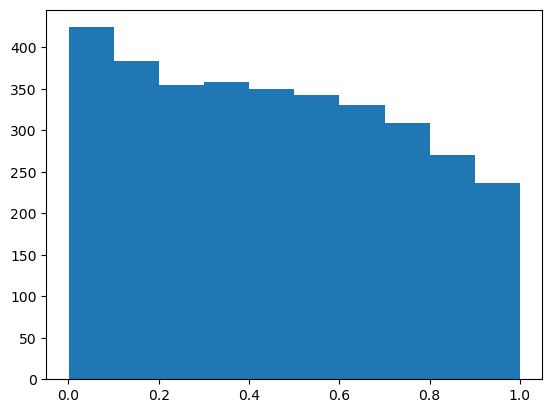

In [73]:
plt.hist(Y);

# Домашнее задание

## Easy

Мы бросаем честный шестигранный кубик. Какова вероятность:

- выкинуть 6 только с третьего раза?
- выкинуть 6 два раза из трех?

Можно воспользоваться как расчетом по формуле, так и `scipy.stats`.

In [77]:
# Ваш код ниже:
X = st.geom(1/6)
X.pmf(3)

0.11574074074074076

In [78]:
X = st.binom(3, 1/6)
X.pmf(2)

0.06944444444444445

## Normal

Мы бросаем тот же кубик 1000 раз.

1. Сколько шестерок выпадет в среднем?

In [79]:
# По формуле Мат.ожидание биномиального распределения = n*p
1000 * (1/6)

166.66666666666666

2. В каком диапазоне будет лежать количество шестерок с вероятностью 94%?

<details>
<summary>Подсказка (нажмите, чтобы посмотреть):</summary>
Для этого вам понадобится PPF и не забывать, что диапазон двусторонний.
</details>

In [80]:
X = st.binom(1000, 1/6)
X.ppf(0.03)

145.0

In [81]:
X.ppf(0.97)

189.0

## Hard

Число заказов, ожидающих обработки в неком онлайн-магазине распределено по Пуассону c $\lambda = \frac{N}{n\mu}$, где:
N - общее число заказов в день;
$\mu$ - число заказов, которое сотрудник может обработать в день;
n - количество сотрудников.

Пусть $N=5$ и $\mu=1$.

Найдите число работников, при котором более 4 заказов будут в ожидании с вероятностью менее 10%.

In [82]:
X = st.poisson(2.5)
1 - X.cdf(4)

0.10882198108584873

Ответ: 3